In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

  

In [9]:

movies = pd.read_csv("/Users/Karam/Documents/GitHub/FTDSExercises/Project3/IMDB dataset/IMDb movies.csv")
movies.head()  

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [10]:
ratings = pd.read_csv("//Users/Karam/Documents/GitHub/FTDSExercises/Project3/IMDB dataset/IMDb ratings.csv")
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [11]:
movies.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [14]:
data = pd.DataFrame()

In [15]:
c = movies['avg_vote'].mean()
c

5.898655873274613

In [18]:
m = movies["votes"].quantile(0.9)
m

9819.600000000006

In [19]:
data  = movies[movies['votes']>=m]
data

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
47,tt0004972,Nascita di una nazione,The Birth of a Nation,1915,1915-03-21,"Drama, History, War",195,USA,None,D.W. Griffith,...,"Henry B. Walthall, Lillian Gish, Mae Marsh, Mi...",The Stoneman family finds its friendship with ...,6.3,22213,$ 100000,NaN,NaN,NaN,368.0,97.0
76,tt0006864,Intolerance,Intolerance: Love's Struggle Throughout the Ages,1916,1918-02-24,"Drama, History",163,USA,English,D.W. Griffith,...,"Lillian Gish, Mae Marsh, Robert Harron, F.A. T...","The story of a poor young woman, separated by ...",7.8,13875,$ 385907,NaN,NaN,99.0,111.0,77.0
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.1,55601,$ 18000,$ 8811,$ 8811,NaN,237.0,160.0
251,tt0012349,Il monello,The Kid,1921,1923-11-26,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,...,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...","The Tramp cares for an abandoned child, but ev...",8.3,109038,$ 250000,NaN,$ 26916,NaN,173.0,105.0
252,tt0012364,Il carrettiere della morte,Körkarlen,1921,1922,"Drama, Fantasy, Horror",107,Sweden,Swedish,Victor Sjöström,...,"Victor Sjöström, Hilda Borgström, Tore Svennbe...","On New Year's Eve, the driver of a ghostly car...",8.1,10054,NaN,NaN,NaN,NaN,68.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85735,tt9777644,Da 5 Bloods - Come fratelli,Da 5 Bloods,2020,2020-06-12,"Adventure, Drama, War",154,USA,"English, Finnish, French, Vietnamese",Spike Lee,...,"Delroy Lindo, Jonathan Majors, Clarke Peters, ...",Four African American vets battle the forces o...,6.5,29694,NaN,NaN,NaN,82.0,673.0,217.0
85747,tt9784456,The Kissing Booth 2,The Kissing Booth 2,2020,2020-07-24,"Comedy, Romance",134,"UK, USA",English,Vince Marcello,...,"Joey King, Joel Courtney, Jacob Elordi, Molly ...","In the sequel to 2018's THE KISSING BOOTH, hig...",5.9,15189,NaN,NaN,NaN,39.0,340.0,46.0
85761,tt9806192,Dov'è il mio corpo?,J'ai perdu mon corps,2019,2019-11-29,"Animation, Drama, Fantasy",81,France,French,Jérémy Clapin,...,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...","A story of Naoufel, a young man who is in love...",7.6,24010,NaN,NaN,$ 1136431,80.0,112.0,106.0
85811,tt9860728,Falling Inn Love - Ristrutturazione con amore,Falling Inn Love,2019,2019-08-29,"Comedy, Romance",98,USA,English,Roger Kumble,...,"Christina Milian, Adam Demos, Jeffrey Bowyer-C...",When city girl Gabriela spontaneously enters a...,5.6,14108,NaN,NaN,NaN,NaN,265.0,32.0


In [20]:
data.shape

(8586, 22)

In [21]:
movies.shape

(85855, 22)

In [22]:
ratings.isnull().sum()

imdb_title_id                    0
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8                          0
votes_7                          0
votes_6                          0
votes_5                          0
votes_4                          0
votes_3                          0
votes_2                          0
votes_1                          0
allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes   

In [23]:
names = pd.read_csv("//Users/Karam/Documents/GitHub/FTDSExercises/Project3/IMDB dataset/IMDb names.csv")
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [24]:
title_principles = pd.read_csv("/Users/Karam/Documents/GitHub/FTDSExercises/Project3/IMDB dataset/IMDb title_principals.csv")
title_principles

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...
835508,tt9914942,6,nm3678448,writer,NaN,NaN
835509,tt9914942,7,nm9361716,writer,novel,NaN
835510,tt9914942,8,nm2262072,composer,NaN,NaN
835511,tt9914942,9,nm1966322,cinematographer,NaN,NaN


In [25]:
movies.isnull().sum()



imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [26]:
# Drop columns with more than 10% null values
drop_cols = movies.isnull().sum()/len(movies) <=0.1
new_movies = movies.loc[:,drop_cols]

In [27]:
drop_cols2 = ratings.isnull().sum()/len(movies)<= 0.1
new_ratings = ratings.loc[:, drop_cols2]

In [28]:
#joining the two dataframes into a big data frame
df = new_movies.set_index('imdb_title_id').join(new_ratings.set_index('imdb_title_id'))
df


,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0


In [29]:
df.fillna(value = 0, axis = 1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",0,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0


In [30]:
df.shape

(85855, 58)

In [37]:
df.isnull().any()

original_title               False
year                         False
date_published               False
genre                        False
duration                     False
country                       True
language                      True
director                      True
writer                        True
production_company            True
actors                        True
description                   True
avg_vote                     False
votes                        False
reviews_from_users            True
weighted_average_vote        False
total_votes                  False
mean_vote                    False
median_vote                  False
votes_10                     False
votes_9                      False
votes_8                      False
votes_7                      False
votes_6                      False
votes_5                      False
votes_4                      False
votes_3                      False
votes_2                      False
votes_1             

In [41]:

df

,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9908390,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
tt9911196,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0


In [43]:
df.fillna(value = 0, axis = 1, inplace = True)
df.shape

(85855, 57)

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

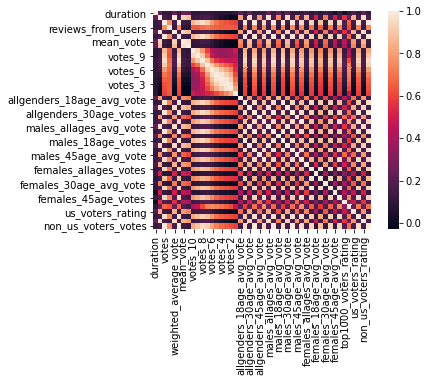

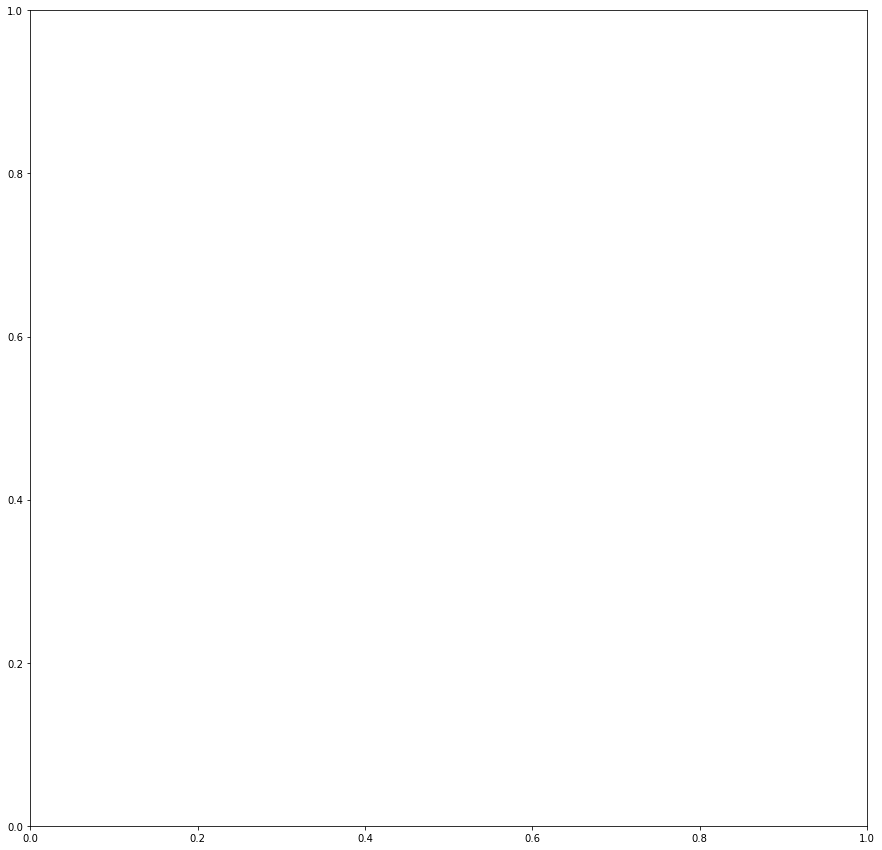

In [56]:
sns.heatmap(df.corr(), vmax = 1, square = True)
plt.subplots(figsize=(15,15))